# Human Activity Recognition (HAR) Classification Project

This notebook guides you through building a supervised learning model to classify 6 human activities using sensor data.

**Follow the guide in `HAR_Classification_Guide.md` for detailed explanations and concepts.**


## Step 1: Import Libraries and Load Data


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the datasets
# TODO: Write code to load train.csv and test.csv
# Hint: Use pd.read_csv()
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')


## Step 2: Explore the Dataset


In [2]:
# TODO: Explore the dataset
# - Print shape, columns, data types
#print(test_df.shape)
#print(test_df.columns)
#print(test_df.dtypes)
# print(test_df.head())
# - Check for missing values
# print(test_df.info())
#print (test_df.isnull().sum())

#print(test_df.describe())
# - Explore activity distribution
# - Explore subject distribution
#act_df = test_df['Activity'].value_counts()

#act_df.plot(kind='bar')
#sns.countplot(data=test_df, x='Activity')
#plt.tight_layout()

print("unique subjects:", test_df['subject'].nunique())
print("7777")







unique subjects: 9
7777


## Step 3: Separate Features and Target Labels


In [3]:
from sklearn.preprocessing import LabelEncoder

# TODO: Separate features (X) from target (y)
# - Exclude 'subject' and 'Activity' columns from features
# - Create X_train, y_train, X_test, y_test
X_train = train_df.drop(['subject','Activity'], axis=1)
X_test = test_df.drop(['subject','Activity'], axis=1)

y_train = train_df['Activity']
y_test = test_df['Activity'] # 2900x1 array of activity STRINGS


# TODO: Encode activity labels to numbers
# - Use LabelEncoder
# - Print the mapping
encoder = LabelEncoder()
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train) # 2900x1 array of activity INTS
y_test_encoded = encoder.transform(y_test) 

encoder.classes_




array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

## Step 4: Data Preprocessing


In [4]:
from sklearn.preprocessing import StandardScaler

# TODO: Scale the features
# - Create StandardScaler
scaler = StandardScaler()
# - Fit on training data only
scaler.fit(X_train)
# - Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Note: For Random Forest, scaling isn't strictly necessary,
# but it's good practice and allows you to try other algorithms later


## Step 5: Train-Validation Split


In [5]:
from sklearn.model_selection import train_test_split

# TODO: Split training data into train and validation sets
# - Use train_test_split with test_size=0.2, random_state=42
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)
# - This gives us: X_train_split, X_val, y_train_split, y_val


## Step 6: Train Initial Model


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# TODO: Create and train a Random Forest model
# - Start with: n_estimators=100, random_state=42
forest = RandomForestClassifier(n_estimators=100, random_state=42)
# - Fit on X_train_split, y_train_split
forest.fit(X_train_split, y_train_split)

# TODO: Make predictions and evaluate
# - Predict on training and validation sets
y_train_pred = forest.predict(X_train_split)
y_val_pred = forest.predict(X_val)
# - Calculate and print accuracies
acc_train = accuracy_score(y_train_split, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)

print("Accuracy on training set: " + str(acc_train*100) + "%") #was 100%
print("Accuracy on validation set: " + str(acc_val*100) + "%")#was 97.76%

# - Print classification report
print(classification_report(y_val, y_val_pred))




Accuracy on training set: 100.0%
Accuracy on validation set: 97.75662814411965%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.95      0.95      0.95       262
           2       0.95      0.96      0.95       276
           3       1.00      0.99      1.00       247
           4       0.99      0.98      0.99       206
           5       0.97      0.99      0.98       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



## Step 7: Hyperparameter Tuning


In [17]:
from sklearn.model_selection import GridSearchCV

# TODO: Define parameter grid
# - Create dictionary with hyperparameters to try
# param_grid = {
#     'n_estimators': [150,200,300],
#     'max_depth': [30,40,None],
#     'min_samples_split': [2,3,4]
# }



# # TODO: Create GridSearchCV
# # - Use RandomForestClassifier as estimator
# # - Specify cv=5, scoring='accuracy', n_jobs=-1
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

# # TODO: Fit and get best parameters
# # - Fit on X_train_split, y_train_split
# # - Print best_params_ and best_score_
# grid_search.fit(X_train_split, y_train_split)
# print(grid_search.best_params_)
# print(grid_search.best_score_)


# TODO: Train final model with best parameters
# - Fit on full training set (X_train, y_train)
model = RandomForestClassifier(n_estimators=100,random_state=42)#max_depth=None,min_samples_split=2,
model.fit(X_train_scaled, y_train_encoded)

y_train_pred = model.predict(X_train_scaled)
acc_train = accuracy_score(y_train_encoded, y_train_pred)
print("Accuracy of full training set on itself is: " + str(acc_train*100) + "%")


# {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
# 0.9794252365347159
# {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
# 0.9794252365347159


Accuracy of full training set on itself is: 100.0%


## Step 8: Evaluate on Test Set


=== SUBJECT DISTRIBUTION ANALYSIS ===

Training set subjects: [np.int64(1), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(11), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(19), np.int64(21), np.int64(22), np.int64(23), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30)]
Test set subjects: [np.int64(2), np.int64(4), np.int64(9), np.int64(10), np.int64(12), np.int64(13), np.int64(18), np.int64(20), np.int64(24)]

Overlapping subjects: set()
Unique to train: {np.int64(1), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(11), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(19), np.int64(21), np.int64(22), np.int64(23), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30)}
Unique to test: {np.int64(2), np.int64(4), np.int64(9), np.int64(10), np.int64(12), np.int64(13), np.int64(18), np.int64(20), np.int64(24)}

=== WHY ACCURACY DROPS EVEN TH

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# TODO: Make predictions on test set
# - Use trained model to predict X_test
y_test_pred = model.predict(X_test_scaled)

# TODO: Calculate test accuracy
acc_test = accuracy_score(y_test_encoded, y_test_pred)
print("Accuracy on final model on test set is: " + str(acc_test*100) + "%")

# TODO: Create confusion matrix
# - Use confusion_matrix(y_test, y_pred)
# - Create heatmap visualization

# TODO: Print classification report


Accuracy on final model on test set is: 92.67051238547675%


## Step 9: Feature Importance Analysis


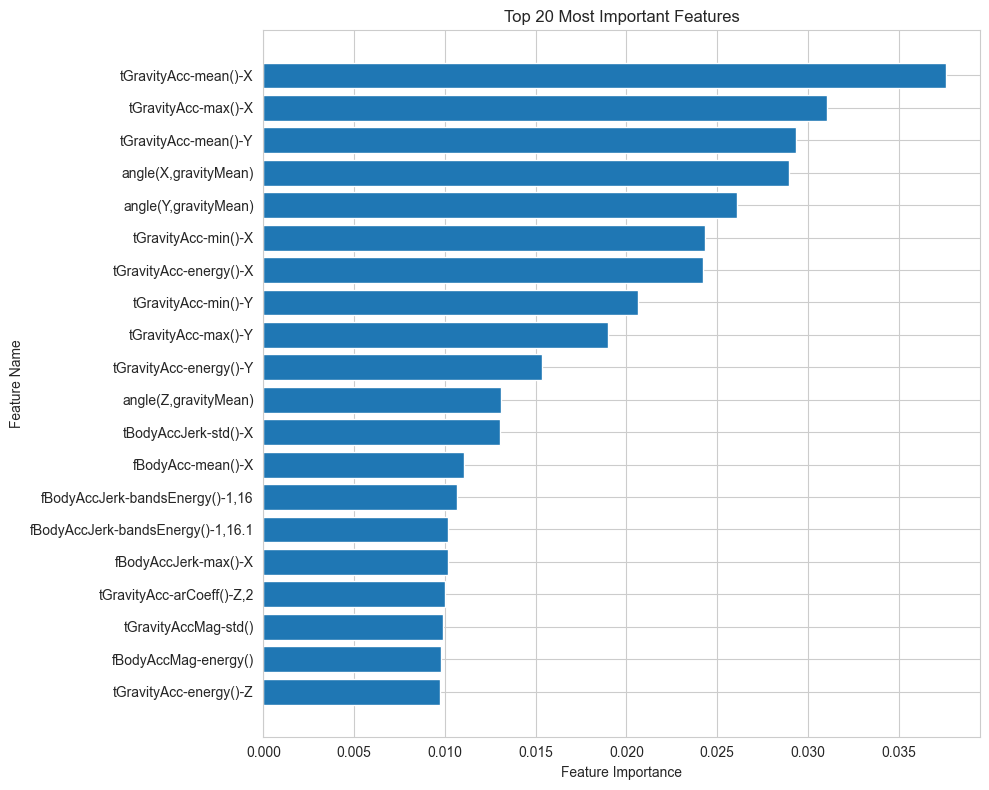

In [46]:
# TODO: Get feature importances
# - Access .feature_importances_ from trained model
#print(model.feature_importances_)
features = X_train.columns
feature_importances = model.feature_importances_

# TODO: Create DataFrame and sort by importance
feature_imp_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
})



# TODO: Visualize top 20 most important features
feature_imp_df = feature_imp_df.sort_values('importance', ascending=False)
#print(feature_imp_df.head(20))
# - Create horizontal bar plot
plt.figure(figsize=(10,8))
top_20 = feature_imp_df.head(20)
plt.barh(range(len(top_20)),top_20['importance'])
_ = plt.yticks(range(len(top_20)),top_20['feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()





## Step 10: Comprehensive Visualizations


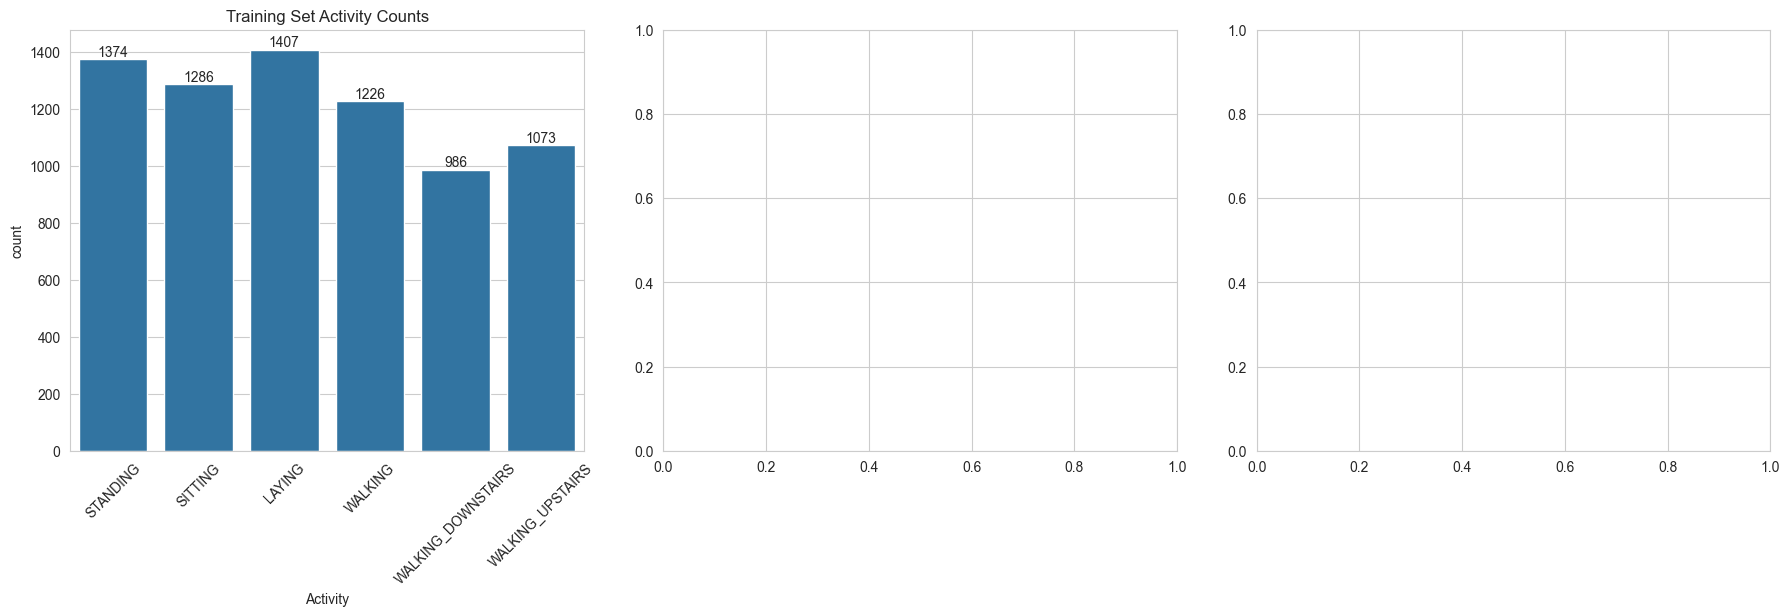

In [81]:
# TODO: Create a figure with multiple subplots
# - Activity distribution
# - Confusion matrix
# - Top feature importances
from numpy.matlib import pad


fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.countplot(data=train_df, x='Activity', ax=axes[0])
plt.tight_layout()
axes[0].set_title('Training Set Activity Counts')
axes[0].bar_label(axes[0].containers[0])
axes[0].tick_params(axis='x', rotation=45)




# TODO: Add titles, labels, formatting

# TODO: Save the figure


## Step 11: (Optional) Anomaly Detection


In [ ]:
# TODO: Get prediction probabilities
# - Use .predict_proba() instead of .predict()

# TODO: Calculate confidence scores
# - Max probability for each prediction = confidence

# TODO: Set confidence threshold and flag anomalies
# - Try threshold = 0.7
# - Flag predictions below threshold

# TODO: Analyze and visualize anomalies
